CloudAEye webinar series episode 2

> In this episode we are exploring basic of supervised ML model building. 

> Code examples
1. Train-test split
2. Linear regression
2. Bias-variance tradeoff


We will use Python's very popular scikit-learn and pandas packages for these examples

In [ ]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import numpy as np


We will use Diabetes data for this exercise

link: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html

In [ ]:
# Load the diabetes dataset
diabetes_Xold, diabetes_y = datasets.load_diabetes(return_X_y=True)

# The dataset has 10 features but we're using only one feature
diabetes_X = diabetes_Xold[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

In [ ]:
print(f"X_train:{np.shape(diabetes_X_train)}\tX_test: {np.shape(diabetes_X_test)}\ty_train:{np.shape(diabetes_y_train)}\ty_test: {np.shape(diabetes_y_test)}")

X_train:(422, 1)	X_test: (20, 1)	y_train:(422,)	y_test: (20,)


In [ ]:
diabetes_Xold

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [ ]:
diabetes_y_train[0:20]

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.])

Build a Regression model

In [ ]:
# fit all models
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)


LinearRegression()

In [ ]:
# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)


Coefficients: 
 [-1.13055924e-01  3.01104641e-02  4.03807204e-02  2.78443820e+00
 -1.72026334e+01  4.43883520e+00 -6.29636221e-03 -1.44786537e+00
  2.62429736e-01 -1.06467863e-02 -9.15456240e-01  1.23513347e-02
 -5.08571424e-01]
Mean squared error: 2548.07
Coefficient of determination: 0.47


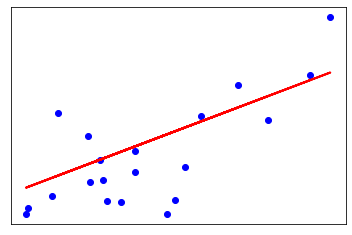

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color="blue")
plt.plot(diabetes_X_test, diabetes_y_pred, color="red", linewidth=2)

plt.xticks(())
plt.yticks(())

plt.show()

# A more complex example
Use the Boston Housing data from last episode and build a linear regression model using all the features



In [ ]:
# load data
boston = datasets.load_boston()
X, y = boston.data, boston.target
boston_X_train, boston_X_test, boston_y_train, boston_y_test = train_test_split(X, y, test_size=.2, random_state=42)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
# Train the model using the training sets
regr.fit(boston_X_train, boston_y_train)
# Make predictions using the testing set
boston_y_pred = regr.predict(boston_X_test)

In [ ]:
# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(boston_y_test, boston_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(boston_y_test, boston_y_pred))



Coefficients: 
 [-1.13055924e-01  3.01104641e-02  4.03807204e-02  2.78443820e+00
 -1.72026334e+01  4.43883520e+00 -6.29636221e-03 -1.44786537e+00
  2.62429736e-01 -1.06467863e-02 -9.15456240e-01  1.23513347e-02
 -5.08571424e-01]
Mean squared error: 24.29
Coefficient of determination: 0.67


# Exploring bias-variance tradeoff in model building
Code adapted from https://towardsdatascience.com/bias-variance-trade-off-with-python-example-6519d2084be4

Summary of the following code
In the code snippet below, we are demonstratig the effects of bias-variance and overfitting.

1. We start by generating 100 data points from the function 
𝑌 = sin(πx) + ϵ and splitting them into 80 training (red) and 20 test points (blue) and plot them. Here ϵ is random noise
2. Then we fit regression models of varying complexity (e.g., polynomials of degree from 1 to 10) to fit a model for this data. Then we plot the performance of the models measured by MSE (mean squared error) metric
3. It can be seen that for more complex models, the model performs very good with with training data but performs poorly with test data. We can conclude that-
 a. the complex models are overfitted and showing poor generalization performance
 b. relate this to the bias-variance tradeoff we learned in  the lecture 
 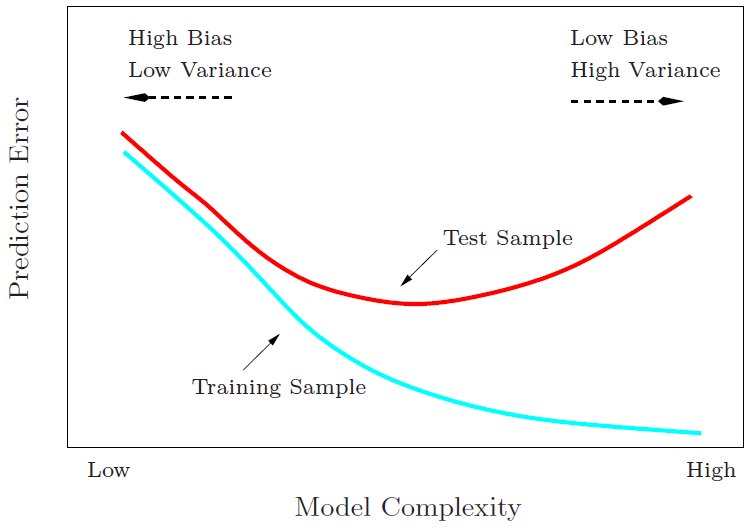

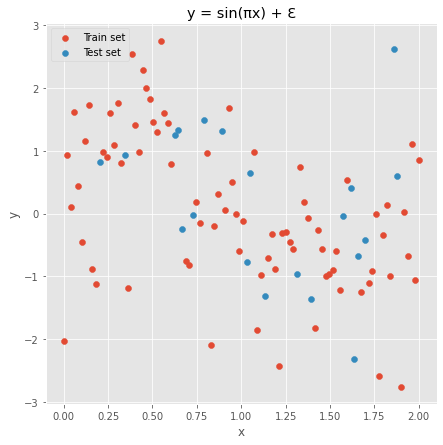

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint
from math import pi as PI
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

plt.style.use('ggplot')

# number of observations
NUM_OBS = 100

# predictors
x = np.linspace(0, 2, num = NUM_OBS)
# noise
eps = np.random.normal(0, 1, NUM_OBS)
# outcome
y = np.sin(PI*x) + eps

x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 1)

fig = plt.figure(figsize = (7,7))
ax = plt.axes()
ax.set_title('y = sin(πx) + Ɛ')
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(x_train, y_train, label = "Train set")
ax.scatter(x_test, y_test, label = "Test set")
ax.legend()

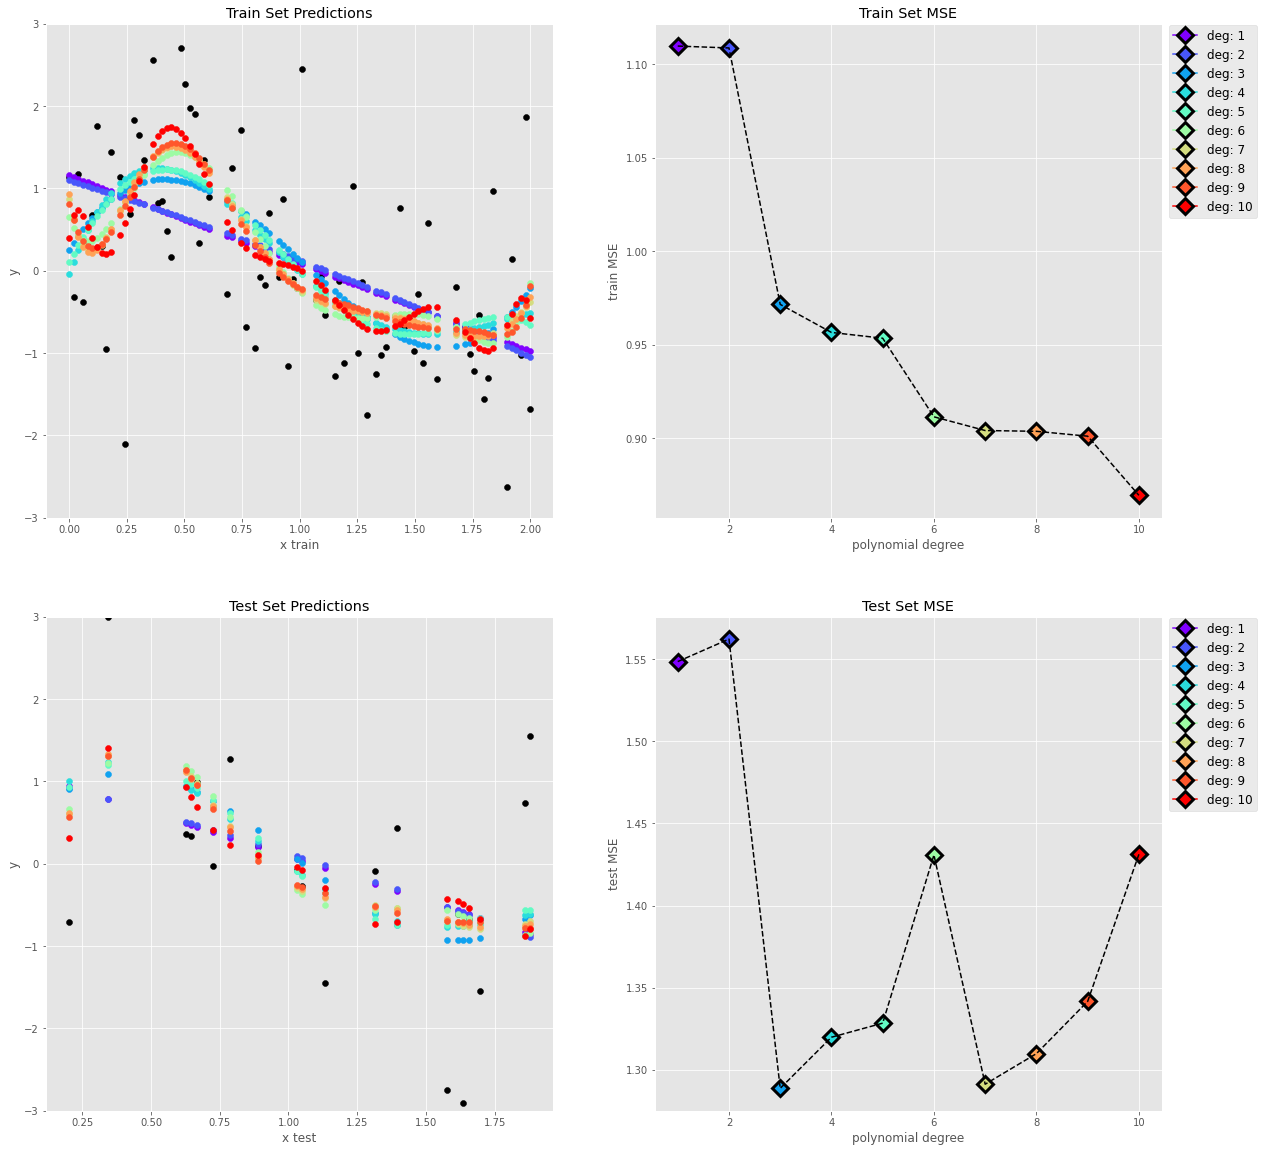

In [ ]:
# number of polynomial models to investigate
NUM_MODELS = 10

colors = iter(plt.cm.rainbow(np.linspace(0, 1, NUM_MODELS)))

fig, axs = plt.subplots(2, 2, figsize = (20,20))

axs[0, 0].set_title('Train Set Predictions')
axs[1, 0].set_title('Test Set Predictions')
axs[0, 1].set_title('Train Set MSE')
axs[1, 1].set_title('Test Set MSE')

axs[0, 0].set_xlabel("x train")
axs[0, 0].set_ylabel("y")
axs[0, 0].set_ylim([-3, 3])

axs[1, 0].set_xlabel("x test")
axs[1, 0].set_ylabel("y")
axs[1, 0].set_ylim([-3, 3])

axs[0, 1].set_xlabel("polynomial degree")
axs[0, 1].set_ylabel("train MSE")

axs[1, 1].set_xlabel("polynomial degree")
axs[1, 1].set_ylabel("test MSE")

axs[0,0].scatter(x_train, y_train, c = 'k', label = "y train")
axs[1,0].scatter(x_test, y_test, c = 'k', label = "y test")

train_mse = []
test_mse = []

for k in range(0, NUM_MODELS):

  c = next(colors)

  # k-th degree polynomial coefficients
  fit_coeff = np.polyfit(x_train, y_train, deg = k+1)

  # train and test k-th degree polynomial fit
  y_train_pred = np.polyval(fit_coeff, x_train)
  y_test_pred = np.polyval(fit_coeff, x_test)

  # plot train and test k-th degree polynomial fit
  axs[0,0].scatter(x_train,
                   y_train_pred,
                   color = c,
                   label = "deg: {}".format(k+1))
  
  axs[1,0].scatter(x_test,
                   y_test_pred,
                   color = c,
                   label = "deg: {}".format(k+1))

  # train and test MSE of k-th degree polynomial fit 
  iter_train_mse = mean_squared_error(y_train_pred, y_train)
  iter_test_mse = mean_squared_error(y_test_pred, y_test)

  train_mse.append(iter_train_mse)
  test_mse.append(iter_test_mse)

  # plot train and test MSE of k-th degree polynomial fit
  axs[0,1].plot(k+1,
                iter_train_mse,
                color = c,
                label = "deg: {}".format(k+1),
                marker = 'D',
                markersize = 12,
                markeredgecolor = 'black',
                markeredgewidth = 3)
  
  axs[1,1].plot(k+1,
                iter_test_mse,
                color = c,
                label = "deg: {}".format(k+1),
                marker = 'D',
                markersize = 12,
                markeredgecolor = 'black',
                markeredgewidth = 3)

# plot dashed line to interpolate MSE measures
axs[0,1].plot(range(1,NUM_MODELS+1), train_mse, 'k--')
axs[1,1].plot(range(1,NUM_MODELS+1), test_mse, 'k--')

# draw legends
axs[0,1].legend(loc = "upper right",
                bbox_to_anchor = (1.2, 1.01),
                prop = {'size': 12})
axs[1,1].legend(loc = "upper right",
                bbox_to_anchor = (1.2, 1.01),
                prop = {'size': 12})

# Further exploration ideas
1. Build a regression model on Diabetes dataset using all the variables. 

2. We discussed regularization in the lecture. Can you apply L1 (Lasso) or L2 (ridge) regularizations to the Y=sin(πx)+ϵ regression that we saw before and examine if regularization techniques help with reducing overfitting
